In [1]:
# scikit-learn
# データマイニングやデータ解析のライブラリ

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
        {
            'A': [1, np.nan, 3, 4, 5],
            'B': [6, 7, 8, np.nan, 10],
            'C': [11, 12, 13 ,14 ,15]
        }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [4]:
from sklearn.impute import SimpleImputer

# 平均値で欠損値を補完するためのインスタンスを作成する
imp = SimpleImputer(strategy = 'mean')
# 欠損値を補完
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [5]:
import pandas as pd
df = pd.DataFrame(
        {
            'A': [1, 2, 3, 4, 5],
            'B': ['a', 'b', 'a', 'b', 'e'],
        }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,e


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [7]:
le.classes_

array(['a', 'b', 'e'], dtype=object)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# DataFrameをコピー
df_ohe = df.copy()
print(df_ohe)

# ColumnTransformerのインスタンス化
ct = ColumnTransformer([('B_x', CountVectorizer(analyzer=lambda x: [x]), 'B')],
    remainder = 'passthrough')
ct.fit_transform(df_ohe)

   A  B
0  1  a
1  2  b
2  3  a
3  4  b
4  5  e


array([[1, 0, 0, 1],
       [0, 1, 0, 2],
       [1, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 0, 1, 5]])

In [9]:
import pandas as pd

df = pd.DataFrame(
        {
            'A': [1, 2, 3, 4, 5],
            'B': [100, 200, 400, 500, 800]
        }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [10]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [11]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


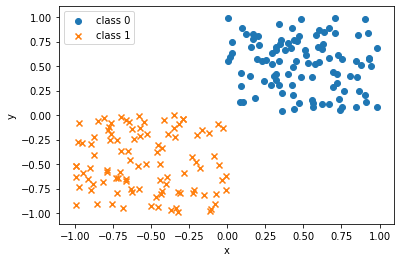

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(size=(100, 2))
y0 = np.repeat(0, 100)
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)

fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [15]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
                        colors='k', levels=[-1, 0, 1],
                        alpha=0.5, linestyles=['--', '--', '--'])
    ax.scatter(svc.support_vectors_[:, 0],
                       svc.support_vectors_[:, 1],
                       s=250, facecolors='none',
                       edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

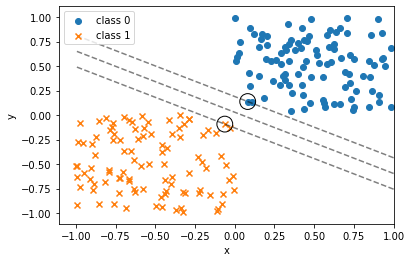

In [16]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

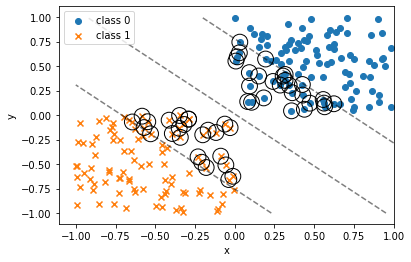

In [17]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

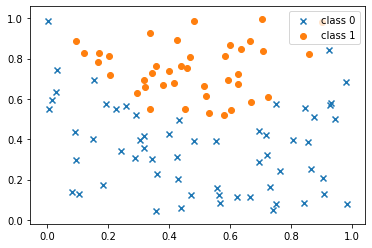

In [18]:
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

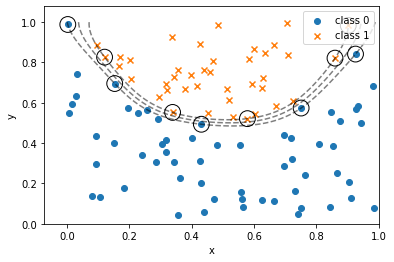

In [19]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, 
                                                   rounded=True,
                                                   class_names=['Setosa',
                                                               'Versicolor',
                                                               'Virginica'],
                                                    feature_names=['Sepal Length',
                                                                                  'Sepal Width',
                                                                                  'Petal Length',
                                                                                  'Petal　Width'],
                                                    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [22]:
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
y_pred = lr.predict(X_test)

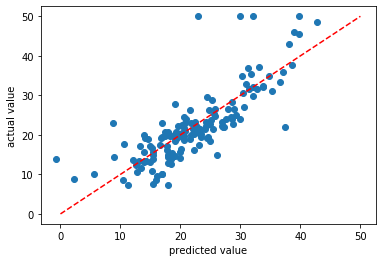

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 50), (0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

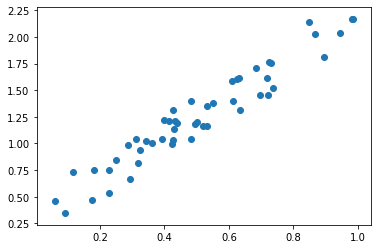

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

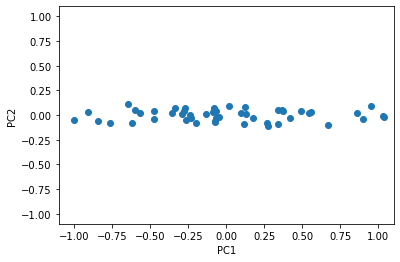

In [8]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

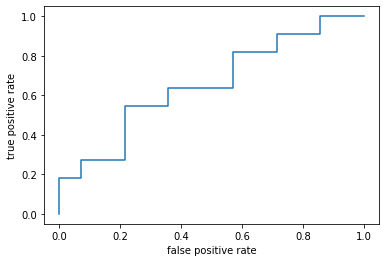

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10,10,10, 11, 11, 11])/11

fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [18]:
from sklearn.metrics import roc_curve

labels = np.array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                                0.8, 0.75, 0.71, 0.63, 0.55,
                                0.51, 0.47, 0.43, 0.38, 0.35,
                                0.31, 0.28, 0.24, 0.22, 0.19,
                                0.15, 0.12, 0.08, 0.04, 0.01])

fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率:', fpr)
print('新陽性率:', tpr)

偽陽性率: [0.         0.         0.         0.06666667 0.06666667 0.26666667
 0.26666667 0.4        0.4        0.6        0.6        0.73333333
 0.73333333 0.86666667 0.86666667 1.        ]
新陽性率: [0.  0.1 0.2 0.2 0.3 0.3 0.5 0.5 0.6 0.6 0.8 0.8 0.9 0.9 1.  1. ]


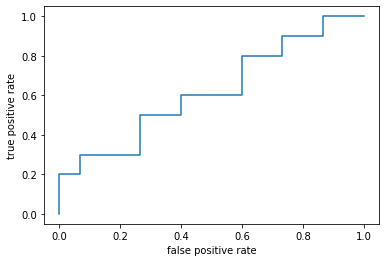

In [19]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(labels, probs)

0.62

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}

cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 4, 5]},
             pre_dispatch='2*n_jobs', re

In [22]:
cv.best_params_

{'max_depth': 3}

In [23]:
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

x = data[:100, [0, 2]]

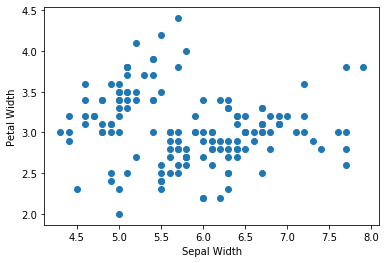

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)

y_km = km.fit_predict(X)

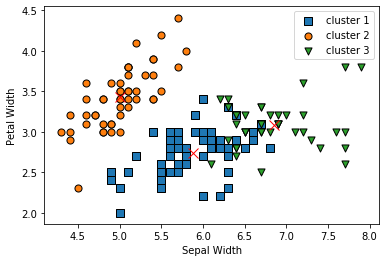

In [29]:
import numpy as np
fig, ax = plt.subplots()

ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, edgecolor='black', marker='s', label='cluster 1')

ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]), marker='x', markersize=10, color='red')

ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, edgecolor='black', marker='o', label='cluster 2')

ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]), marker='x', markersize=10, color='red')

ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, edgecolor='black', marker='v', label='cluster 3')

ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]), marker='x', markersize=10, color='red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

IndexError: index -109 is out of bounds for axis 0 with size 100

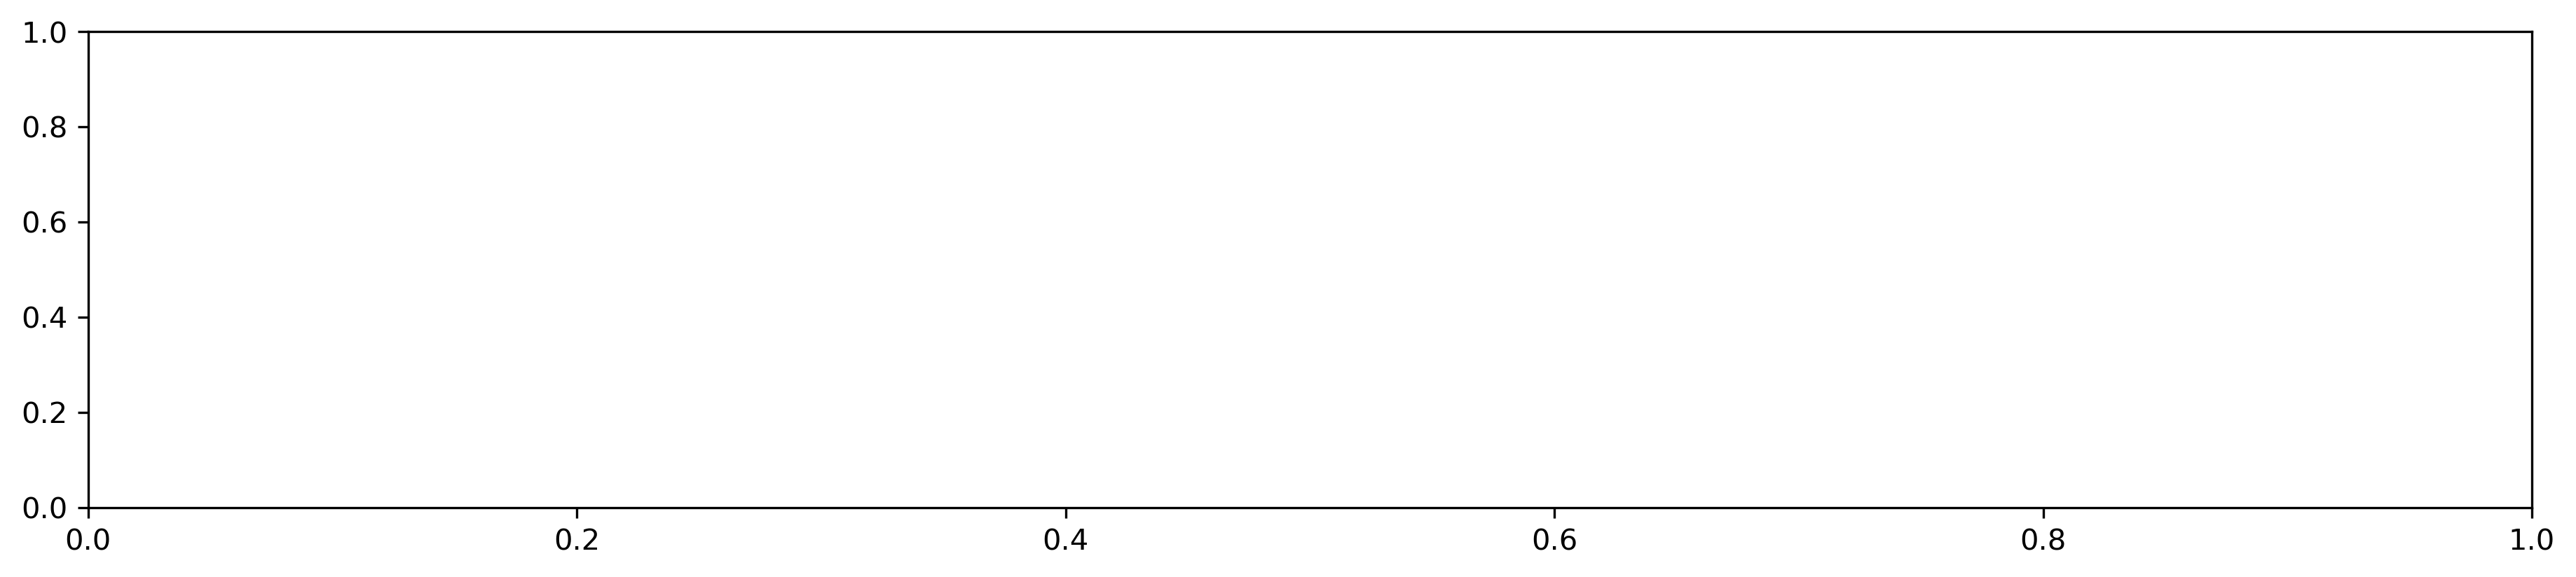

In [33]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

children = ac.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.hstack((children,
                                                  distance[:, np.newaxis],
                                                  no_of_observations[:, np.newaxis])).astype(float)

fig, ax = plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()

In [1]:
# 33

#カテゴリ変数のエンコーディングとは、文字のaを数値の0、bを1、cを2のようにカテゴリ変数を数値に変換する処理をいう。
#One-hotエンコーディングでは、たとえば、テーブル形式のデータのカテゴリ変数の列について、取り得る値の分だけ列を増やして、各行の該当する値の列のみに1を、それ以外の列には0を入力するように変換する処理をいう。
#特徴量の正規化とは、たとえば、ある特徴量の値が2桁の数値（数十のオーダ）、別の特徴量の値が4桁の数値（数千のオーダ）のような場合、後者のオーダの特徴量が重視されやすくなるため、尺度を揃える処理をいう。
#分散正規化とは、特徴量の平均が0、標準偏差が1となるように特徴量を変換する処理であり、標準化やz変換と呼ばれることもある。
#最小最大正規化とは、特徴量の最小値が0、最大値が1を取るように特徴量を正規化する処理であり、scikit-learnでは、preprocessingモジュールのMinMaxScalerクラスを用いて実行することができる。

In [2]:
# 34

#分類は、データのクラスを予測して分けるタスクであり、既知のデータを教師として利用して各データをクラスに振り分けるモデルを学習する教師あり学習の典型的なタスクである。
#分類モデルを構築するには、まず手元のデータセットを学習データセットとテストデータセットに分割する。そして、学習データセットを用いて分類モデルを構築し、構築したモデルのテストデータセットに対する予測を評価し、汎化能力を評価する。
#学習とモデルの評価は、学習データセットとテストデータセットの分割を繰り返し、モデルの構築と評価を複数回行う方法で行うこともできる。この方法を交差検証という。
#学習データセットとテストデータセットの分割は、scikit-learnでは、model_selectionモジュールのtrain_test_split関数を用いて実行することができる。
#scikit-learnのインターフェースでは、学習はfitメソッド、予測はpredictメソッドを用いて実行することができる。

In [3]:
# 35

#ランダムフォレストは、ブートストラップデータを用いて決定木を構築する処理を複数回繰り返し、各木の推定結果の多数決や平均値により分類・回帰を行う手法であり、アンサンブル学習の1つである。
#決定木などで利用される木と呼ばれるデータ構造は頂点であるノードとそれらを結ぶエッジから構成される。木の最下部にあり子ノードを持たないノードはリーフと呼ばれる。
#決定木でデータを分割する時は、データの分割によってどれだけ得をするかについて考える。これを情報利得と呼ぶ。情報利得は親ノードの不純度から子ノードの不純度を差し引いたものとして定義される。
#サポートベクタマシンは、分類・回帰だけでなく外れ値検出にも使えるアルゴリズムであり、直線や平面などで分離できないデータであっても、高次元の空間に写して線形分離することにより分類を行うことを可能にする。
#サポートベクタマシンは、マージンを最大にすることにより決定境界を求めるが、これは、決定境界がサポートベクタから近くなり多少のデータが変わっても誤った分類を行う可能性をを低くし、汎化能力を持たせようとしているためである。

In [4]:
# 36

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(X_train, y_train )
y_pred = lr.predict(X_test)

In [5]:
# 37

 #主成分分析は、scikit-learnのdecompositonモジュールのPCAクラスを用いて実行することができる。

In [6]:
# 38

#適合率は予想するクラスをなるべく間違えないようにしたいときに重視する指標である。
#一般的に適合率と再現率はトレードオフの関係にある。つまり、どちらか一方の指標を高くすると、もう一方の指標は低くなる。
#正解率は、正例か負例かを問わず、予測と実績が一致したデータの割合を表す。正解率は(tp+tn)/(tp+fp+fn+tn）で計算することができる。
#F値は、適合率と再現率の調和平均として定義される。F値は2*適合率*再現率/(適合率+再現率)で計算することができる。

In [15]:
# 39

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [ ]:
# 40

# クラスタリングは、ある基準を設定してデータ間の類似性を計算し、データをクラスタ（グループ）にまとめるタスクであり、教師なし学習の典型的なタスクである。
#凝集型の階層的クラスタリングは、まず似ているデータをまとめて小さなクラスタを作り、次にそのクラスタと似ているデータをまとめ、最終的にデータが1つのクラスタにまとめられるまで処理を繰り返すクラスタリング手法である。
#k-meansは最初にランダムにクラスタ中心を割り当て、クラスタ中心を各データとの距離を計算しながら修正し、最終的なクラスタ中心が収束するまで再計算を行いクラスタリングする手法である。
#k-meansは、scikit-learnのclusterモジュールのKMeansクラスを用いることによって実行することができる。